# <center> $\underline{\textbf{AAG02}}$ <p><center> Gabarito

## $\textbf{1. Importando Bibliotecas}$

In [1]:
import requests
from urllib import request, response, error, parse
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from unicodedata import normalize
import re

## $\textbf{2. Obtendo Dados}$
Os dados foram obtidos via $\textbf{Scraping}$ do site da Pós Graduação $\textit{Strictu Sensu}$ da UFV e contêm a listagem das dissertações defendidas com seus autores e professores orientadores.
A proposta é examinar a distribuição de dissertações orientadas por professor.

In [2]:
url = 'http://www.ppgcc.ufv.br/?page_id=66'
html = urlopen(url)
soup = BeautifulSoup(html,'lxml')

### $\textbf{2.1. Filtrando e Tratando Dados}$

Conforme mostrado na saída a seguir, foi necessário realizar uma limpeza nos dados. Foram extraídos apenas os nomes dos orientadores ignorando acentos e removendo espaçamentos duplos. O resultado é mostrado na "lista" seguinte.

In [15]:
section = soup.find_all('div',class_="post-66 page type-page status-publish hentry")
lista = []
for element in section:
    item = element.find_all('p')
    for i in item:
        orientador = str(i.find(text=re.compile('Orientador:')))
        print(orientador)
        if orientador != "None":
            orientador = (orientador.replace('Orientador:',' ').replace('\n', '').replace('Prof.','').replace('Profa.','').replace('\xa0',''))
            orientador = str(normalize('NFKD', orientador).encode('ASCII', 'ignore'))
            orientador = re.sub(' +',' ',orientador)            
            orientador = re.sub('b\' ','',orientador)
            orientador = re.sub('\'$','',orientador)
            lista.append(orientador)

None

Orientador: Prof. Jugurta Lisboa Filho

Orientador: Prof. Alexandre Santos Brandão

Orientador: Prof. Fabricio Aguiar Silva

Orientador: Prof. Vitor Barbosa Carlos de Souza

Orientador: Prof. José Augusto Miranda Nacif

Orientador: Prof. José Augusto Miranda Nacif

Orientador: Prof. Ricardo dos Santos Ferreira

Orientador: Prof. Alcione de Paiva Oliveira

Orientador: Prof. Jose Elias Claudio Arroyo
None

Orientador: Prof. Alexandre Santos Brandão

Orientador: Prof. Jugurta Lisboa Filho

Orientador: Prof. Alexandre Santos Brandão

Orientador: Prof. Alcione de Paiva Oliveira

Orientador: Profa. Sabrina de Azevedo Silveira

Orientador: Prof. Jugurta Lisboa Filho

Orientador: Prof. José Augusto Miranda Nacif

Orientador:  Profa. Sabrina de Azevedo Silveira

Orientador:  Profa. Sabrina de Azevedo Silveira

Orientador: Prof. Levi Henrique Santana de Lelis

Orientador: Prof. José Augusto Miranda Nacif

Orientador: Prof. Levi Henrique Santana de Lelis
Orientador: Prof. Marcus Vinícius Al

In [4]:
lista

['Jugurta Lisboa Filho',
 'Alexandre Santos Brandao',
 'Fabricio Aguiar Silva',
 'Vitor Barbosa Carlos de Souza',
 'Jose Augusto Miranda Nacif',
 'Jose Augusto Miranda Nacif',
 'Ricardo dos Santos Ferreira',
 'Alcione de Paiva Oliveira',
 'Jose Elias Claudio Arroyo',
 'Alexandre Santos Brandao',
 'Jugurta Lisboa Filho',
 'Alexandre Santos Brandao',
 'Alcione de Paiva Oliveira',
 'Sabrina de Azevedo Silveira',
 'Jugurta Lisboa Filho',
 'Jose Augusto Miranda Nacif',
 'Sabrina de Azevedo Silveira',
 'Sabrina de Azevedo Silveira',
 'Levi Henrique Santana de Lelis',
 'Jose Augusto Miranda Nacif',
 'Levi Henrique Santana de Lelis',
 'Marcus Vinicius Alvim Andrade',
 'Levi Henrique Santana de Lelis',
 'Levi Henrique Santana de Lelis',
 'Murilo Coelho Naldi',
 'Murilo Coelho Naldi',
 'Andre Gustavo dos Santos',
 'Alcione de Paiva Oliveira',
 'Ricardo dos Santos Ferreira',
 'Andre Gustavo dos Santos',
 'Alexandre Santos Brandao',
 'Jose Elias Claudio Arroyo',
 'Alcione de Paiva Oliveira',
 'Lev

### $\textbf{3. Plotando os Dados}$

Os dados foram salvos e lidos de um arquivo para evitar a necessidade de novas consultas ao site e reprocessamento.

In [5]:
arquivo = open('orientadores.txt', 'w')
arquivo.writelines(nome + '\n' for nome in lista)
arquivo.close()

In [6]:
arquivo = open('orientadores.txt', 'r')
lista_arq = arquivo.read().splitlines()
arquivo.close()

In [17]:
serie = pd.Series(data=lista_arq)

É interessante observar que, mesmo depois da limpeza, o conjunto de dados apresenta erros que vão impactar a distribuição.

Por exemplo, "Alcione de Paiva Oliveira" e  "Alcione Paiva de Oliveira" são provavelmente a mesma pessoa e houve erro na inserção dos dados. Isso se repete também em "Heleno do Nascimento Santos", "Heleno do Nacimento Santos" e "Heleno N. Santos", entre outros.

Como o conjunto de dados é pequeno, seria simples tratar esses erros, no entanto em um conjunto maior e de dados desconhecidos, não é possível nem afirmar de fato se essas inserções seriam erros ou valores diferentes. Assim sendo, procedeu-se a plotagem dos dados como foram inseridos.

In [18]:
serie.value_counts()

Jugurta Lisboa Filho                    30
Jose Luis Braga                         29
Alcione de Paiva Oliveira               20
Jose Elias Claudio Arroyo               18
Ricardo dos Santos Ferreira             16
Carlos de Castro Goulart                13
Marcus Vinicius Alvim Andrade           12
Andre Gustavo dos Santos                12
Mauro Nacif Rocha                       10
Fabio Ribeiro Cerqueira                  9
Levi Henrique Santana de Lelis           9
Jose Augusto Miranda Nacif               8
Murilo Coelho Naldi                      5
Vladimir Oliveira Di Iorio               4
Alexandre Santos Brandao                 4
Vladimir Oliveira DiIorio                3
Heleno do Nascimento Santos              3
Jose Elias Arroyo                        3
Sabrina de Azevedo Silveira              3
Luciana Brugiolo Goncalves               2
Angelo de Moura Guimaraes (DCC-UFMG)     1
Fabricio Aguiar Silva                    1
Heleno do Nacimento Santos               1
Vitor Barbo

In [9]:
df = pd.DataFrame(serie.value_counts().sort_values())

In [19]:
df

,0
Heleno N. Santos,1
Leacir Nogueira Bastos,1
Vitor Barbosa Carlos de Souza,1
Heleno do Nacimento Santos,1
Fabricio Aguiar Silva,1
Angelo de Moura Guimaraes (DCC-UFMG),1
Alcione Paiva de Oliveira,1
Luciana Brugiolo Goncalves,2
Sabrina de Azevedo Silveira,3
Jose Elias Arroyo,3


### $\textbf{3.1. CDF}$

A CDF mostra que aproximadamente 70% dos professores orientou 10 ou menos dissertações e aproximadamente 50% orientou menos do que 5 dissertações.

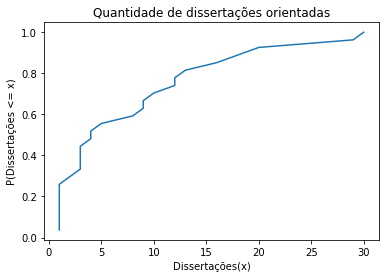

In [20]:
x1 = df
y1 = np.arange(1, len(x1)+1) / float(len(x1))
plt.plot(x1,y1)
plt.title('Quantidade de dissertações orientadas')
plt.ylabel('P(Dissertações <= x)')
plt.xlabel('Dissertações(x)')
plt.show()

### $\textbf{3.2. PMF}$

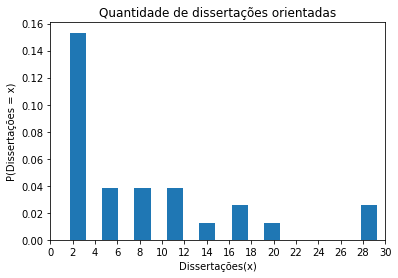

In [23]:
df.plot(kind='hist', density=True, histtype='bar', rwidth=0.5,
                     xlim=(0, 30),
                     legend=False)
plt.xticks((np.arange(0, 30+1, 2.0)))
plt.title('Quantidade de dissertações orientadas')
plt.ylabel('P(Dissertações = x)')
plt.xlabel('Dissertações(x)')
plt.show()